In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Importing dataset
df = pd.read_csv("archive/tmdb_5000_movies.csv")

In [5]:
# Display the first few rows of the DataFrame
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


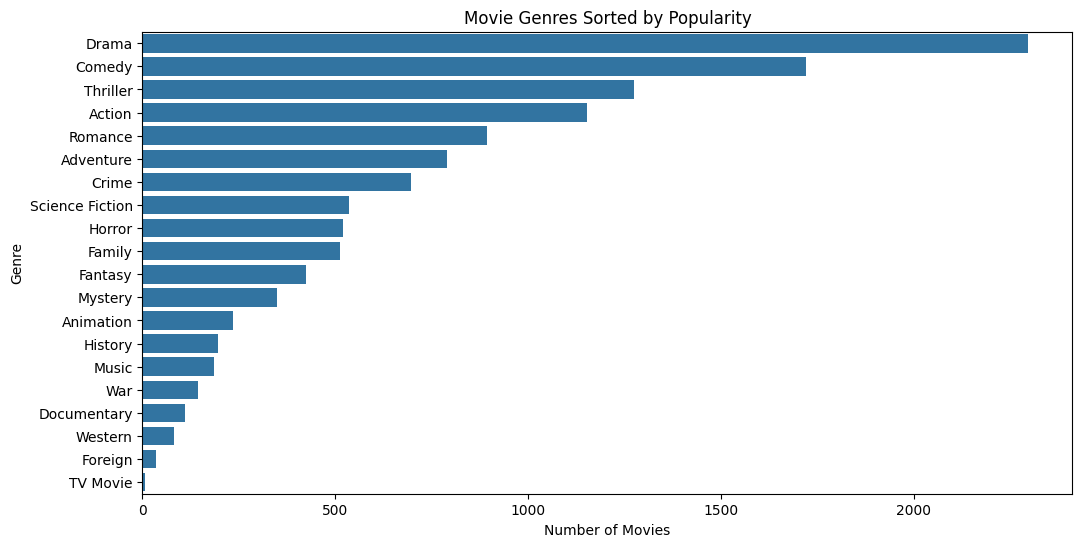

In [6]:
#Most popular Movie Genres

# Create a copy of the DataFrame to avoid affecting the original data
df_copy = df.copy()

# Check if 'genres' column is already a list, if not, parse it as JSON
df_copy['genres'] = df_copy['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Function to extract genre names from the list of dictionaries
def extract_genre_names(genre_list):
    genres = []
    for genre in genre_list:
        genres.append(genre['name'])
    return genres

# Extract genre names
df_copy['genres'] = df_copy['genres'].apply(lambda x: extract_genre_names(x) if isinstance(x, list) else x)

# Flatten the 'genres' column and count genre occurrences
genre_counts = df_copy['genres'].explode().value_counts()

# Sort genres by popularity
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create a bar chart of movie genres sorted by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index, orient='h')
plt.title('Movie Genres Sorted by Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

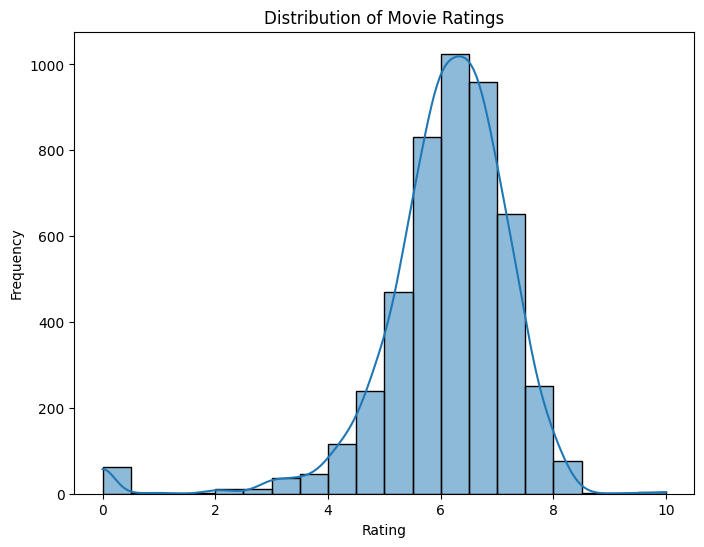

In [7]:
# Movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='vote_average', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

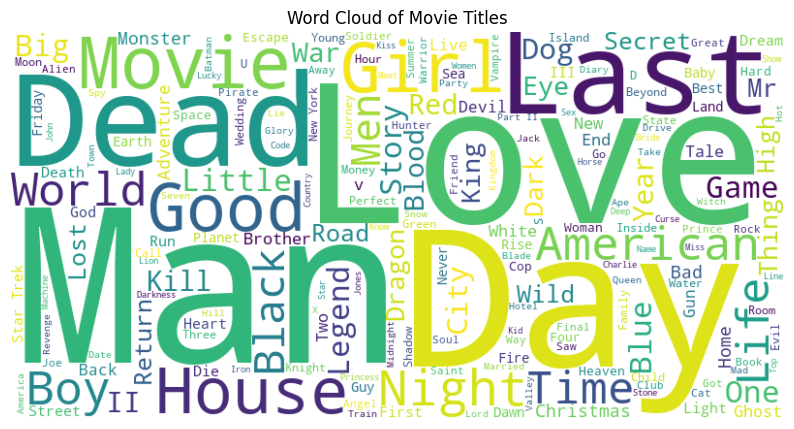

In [8]:
# A word cloud of movie titles
movie_titles = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Titles')
plt.axis('off')
plt.show()

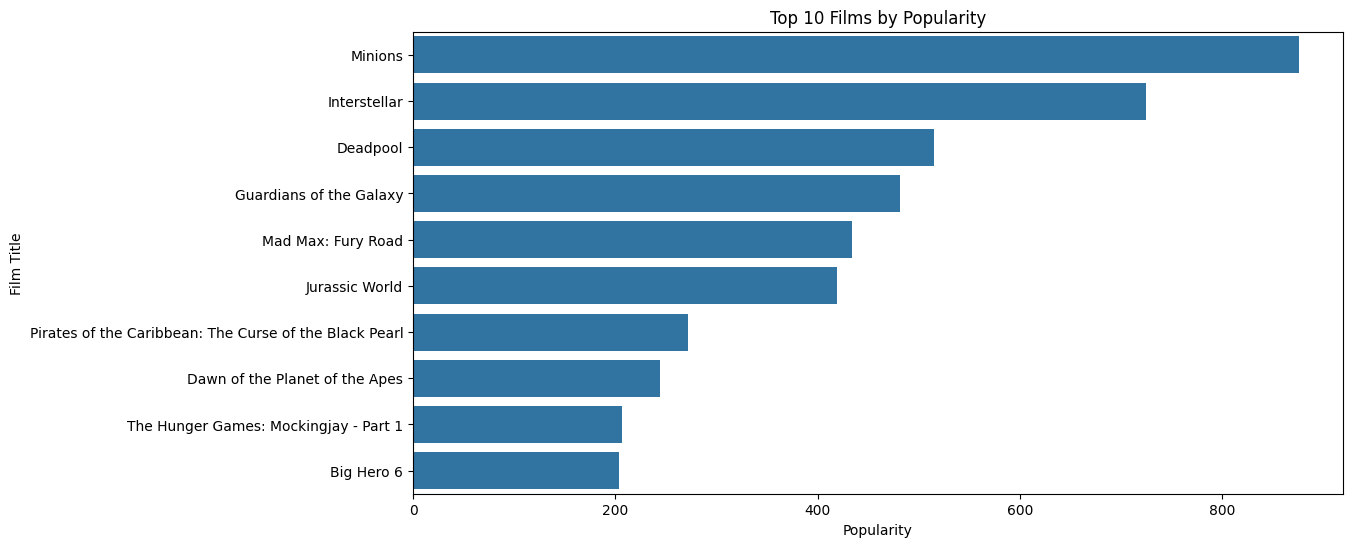

In [9]:
# Sort the DataFrame by popularity in descending order and select the top 10 rows
highest_popularity = df.sort_values(by='popularity', ascending=False).head(10)

# Create a bar chart of the top 10 films by popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='title', data=highest_popularity, orient='h')
plt.title('Top 10 Films by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Film Title')
plt.show()

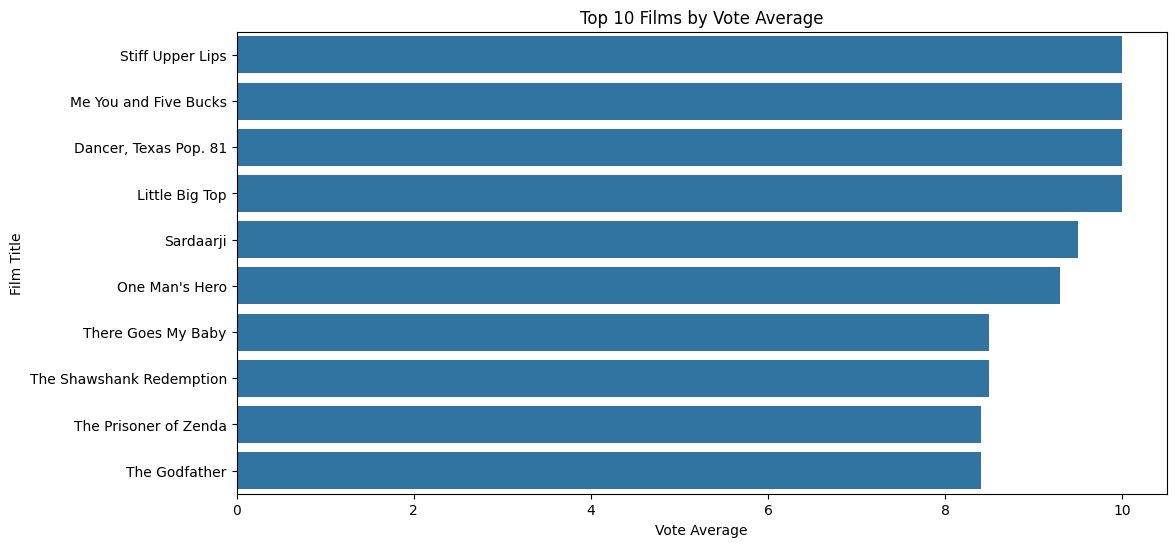

In [10]:
# Sort the DataFrame by vote_average in descending order and select the top 10 rows
highest_vote_average = df.sort_values(by='vote_average', ascending=False).head(10)

# Create a bar chart of the top 10 films by vote_average
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='title', data=highest_vote_average, orient='h')
plt.title('Top 10 Films by Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Film Title')
plt.show()

In [11]:
# Define a function to handle parsing JSON or lists
def parse_json_or_list(value):
    try:
        # Attempt to parse as JSON
        return json.loads(value)  # Try to parse the input 'value' as JSON using the json.loads() function.
    except (TypeError, ValueError):
        # If it's not valid JSON, assume it's a list (e.g., genres or keywords column)
        return eval(value)  # If parsing as JSON raises an error, assume 'value' is a list-like structure (eval() is used here, which can evaluate Python expressions).

In [12]:
# Apply the function to 'genres' and 'keywords' columns
df['genres'] = df['genres'].apply(parse_json_or_list)  # Apply the 'parse_json_or_list' function to the 'genres' column, which contains JSON or list data. This function parses JSON or assumes it's a list.
df['keywords'] = df['keywords'].apply(parse_json_or_list)  # Apply the 'parse_json_or_list' function to the 'keywords' column, which also contains JSON or list data.

In [13]:
# Define a function to create a combined string of genres and keywords
def genres_and_keywords_to_string(row):
    # Access the 'genres' and 'keywords' columns from the input 'row'
    genres = row['genres']
    keywords = row['keywords']
    
    # Extract and join the names of genres and keywords into separate strings
    genres_str = ' '.join(''.join(j['name'].split()) for j in genres)
    keywords_str = ' '.join(''.join(j['name'].split()) for j in keywords)

    # Combine genres and keywords into a single string, separating them with a space
    return f"{genres_str} {keywords_str}"

In [14]:
# Apply the function to each row of the DataFrame and store the result in a new column 'string'
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [15]:
# Initialize the TF-IDF vectorizer with a specified maximum number of features
tfidf = TfidfVectorizer(max_features=2000)

In [16]:
# Fit and transform the 'string' column using TF-IDF vectorization
X = tfidf.fit_transform(df['string'])

In [17]:
# Create a mapping from movie titles to DataFrame indices
title_to_index = pd.Series(df.index, index=df['title'])

In [18]:
# Define a function to recommend movies based on a given title
def recommend(title):
    # Get the index of the input movie title
    movie_id = title_to_index[title]

    # Extract the TF-IDF vector for the input movie
    query = X[movie_id]

    # Calculate cosine similarities between the input movie and all movies
    scores = cosine_similarity(query, X)

    # Flatten the similarity scores
    scores = scores.flatten()

    # Sort indices by descending similarity scores (excluding the input movie itself)
    recommended_movie_id = (-scores).argsort()[1:11]

    # Return the titles of the top 10 recommended movies
    return df['title'].iloc[recommended_movie_id]

In [19]:
# Test the recommendation function
input_movie_title = 'Interstellar'
recommended_movie_titles = recommend(input_movie_title)

# Display the recommendations with popularity and vote average
print(f"\nRecommendations for '{input_movie_title}':")
for i, movie_title in enumerate(recommended_movie_titles, start=1):
    # Look up the movie in the original DataFrame
    recommended_movie = df[df['title'] == movie_title].iloc[0]
    popularity = recommended_movie['popularity']
    vote_average = recommended_movie['vote_average']
    print(f"{i}. {movie_title} (Popularity: {popularity:.2f}, Vote Average: {vote_average:.2f})")


Recommendations for 'Interstellar':
1. Apollo 13 (Popularity: 68.14, Vote Average: 7.30)
2. Silent Running (Popularity: 11.10, Vote Average: 6.30)
3. Space Cowboys (Popularity: 15.77, Vote Average: 6.30)
4. Elysium (Popularity: 67.34, Vote Average: 6.40)
5. In the Shadow of the Moon (Popularity: 3.43, Vote Average: 7.60)
6. The Martian (Popularity: 167.93, Vote Average: 7.60)
7. Oblivion (Popularity: 67.70, Vote Average: 6.40)
8. The Astronaut's Wife (Popularity: 20.70, Vote Average: 5.40)
9. 2001: A Space Odyssey (Popularity: 86.20, Vote Average: 7.90)
10. Escape from Planet Earth (Popularity: 18.14, Vote Average: 5.70)


In [20]:
# Test the recommendation function
input_movie_title = 'Minions'
recommended_movie_titles = recommend(input_movie_title)

# Display the recommendations with popularity and vote average
print(f"\nRecommendations for '{input_movie_title}':")
for i, movie_title in enumerate(recommended_movie_titles, start=1):
    # Look up the movie in the original DataFrame
    recommended_movie = df[df['title'] == movie_title].iloc[0]
    popularity = recommended_movie['popularity']
    vote_average = recommended_movie['vote_average']
    print(f"{i}. {movie_title} (Popularity: {popularity:.2f}, Vote Average: {vote_average:.2f})")



Recommendations for 'Minions':
1. Despicable Me 2 (Popularity: 136.89, Vote Average: 7.00)
2. The Nut Job (Popularity: 18.57, Vote Average: 5.50)
3. Khumba (Popularity: 6.46, Vote Average: 5.80)
4. Shrek Forever After (Popularity: 44.04, Vote Average: 6.00)
5. A Turtle's Tale: Sammy's Adventures (Popularity: 15.81, Vote Average: 5.60)
6. Madagascar 3: Europe's Most Wanted (Popularity: 44.99, Vote Average: 6.40)
7. The Peanuts Movie (Popularity: 34.31, Vote Average: 6.50)
8. The Master of Disguise (Popularity: 4.38, Vote Average: 3.70)
9. Cats & Dogs 2 : The Revenge of Kitty Galore (Popularity: 11.77, Vote Average: 4.90)
10. Top Cat Begins (Popularity: 0.72, Vote Average: 5.30)


In [22]:
# Test the recommendation function
input_movie_title = 'Harry Potter and the Half-Blood Prince'
recommended_movie_titles = recommend(input_movie_title)

# Display the recommendations with popularity and vote average
print(f"\nRecommendations for '{input_movie_title}':")
for i, movie_title in enumerate(recommended_movie_titles, start=1):
    # Look up the movie in the original DataFrame
    recommended_movie = df[df['title'] == movie_title].iloc[0]
    popularity = recommended_movie['popularity']
    vote_average = recommended_movie['vote_average']
    print(f"{i}. {movie_title} (Popularity: {popularity:.2f}, Vote Average: {vote_average:.2f})")



Recommendations for 'Harry Potter and the Half-Blood Prince':
1. Harry Potter and the Chamber of Secrets (Popularity: 132.40, Vote Average: 7.40)
2. Harry Potter and the Prisoner of Azkaban (Popularity: 79.68, Vote Average: 7.70)
3. Goosebumps (Popularity: 45.35, Vote Average: 6.20)
4. Harry Potter and the Order of the Phoenix (Popularity: 78.14, Vote Average: 7.40)
5. Teen Wolf Too (Popularity: 4.10, Vote Average: 3.80)
6. Harry Potter and the Goblet of Fire (Popularity: 101.25, Vote Average: 7.50)
7. Harry Potter and the Philosopher's Stone (Popularity: 109.98, Vote Average: 7.50)
8. Thunder and the House of Magic (Popularity: 12.87, Vote Average: 6.30)
9. Return to Oz (Popularity: 5.65, Vote Average: 6.70)
10. The Huntsman: Winter's War (Popularity: 60.47, Vote Average: 6.00)
